In [16]:
# Libraries
import math
import pandas as pd
import sympy as smp
import numpy as np
from sympy import *
from math import *

# Scipy stats
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import uniform

# Scipy operations
from scipy.integrate import quad
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.special as special

# Miscellaneous
import matplotlib.pyplot as plt
# from fractions import Fraction
from sympy import Rational as R
from sympy import nsimplify
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

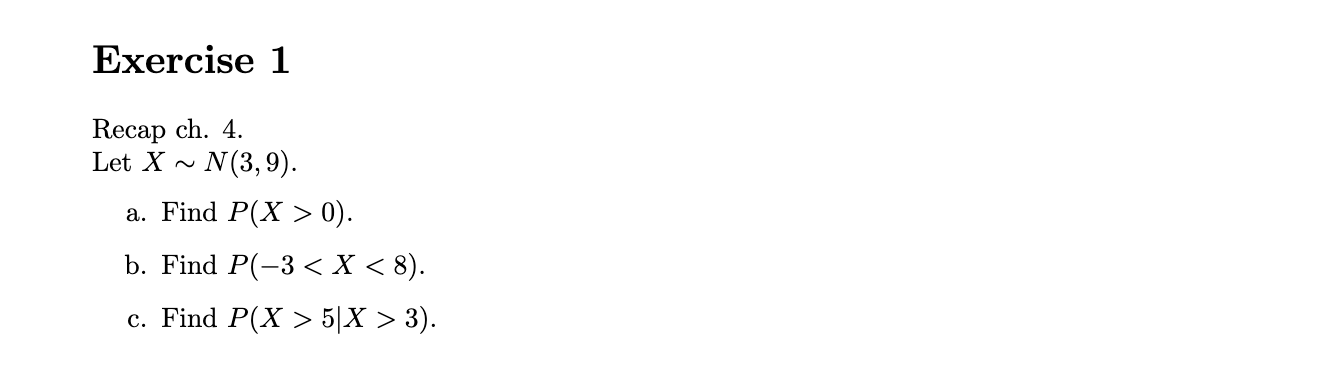

In [17]:
Image('https://cdn.mathpix.com/snip/images/p-sQXNyFw_ohNcZtI0Kt0dHW8UQhQsckC_PjmXg6Vf4.original.fullsize.png', width=500)

In [18]:
#a) Find P(x>0)
# sf is bigger than some value, pmf is equal to some value, cdf is less than some value
# x~N(3,3)
# P(x>0) = 1 - P(x<=0)
# P(x>0) = 1 - P(z<=-1)
# P(x>0) = 1 - 0.1587
# P(x>0) = 0.8413

solution = norm.sf(0,3,3)
solution = round(solution,4)
print(solution)

#b) Find P(-3<x<8)
# P(-3<x<8) = P(x<8) - P(x<-3)
solution = norm.cdf(8,3,3) - norm.cdf(-3,3,3)
solution = round(solution,4)
print(solution)

#c) Find P(x>5|x>3)
solution = norm.sf(5,3,3)/norm.sf(3,3,3)
solution = round(solution,4)
print(solution)

0.8413
0.9295
0.505


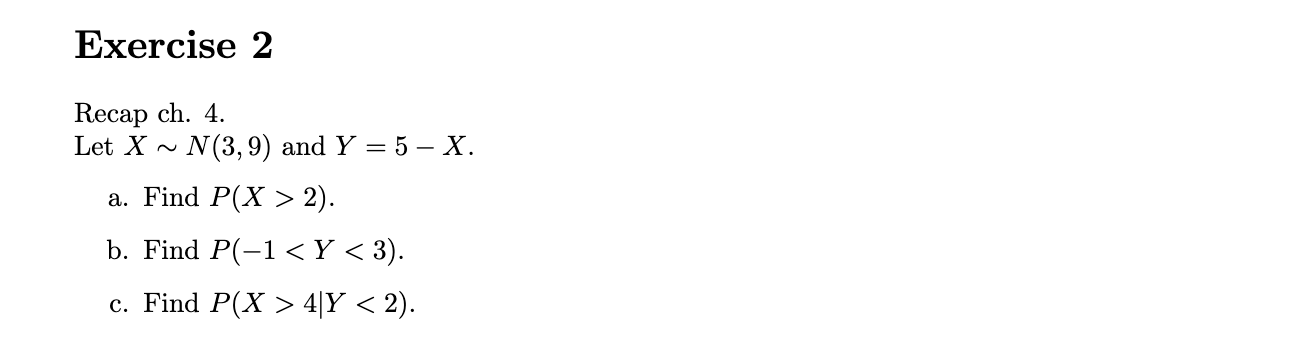

In [19]:
Image('https://cdn.mathpix.com/snip/images/GwjUvnP1aKqb-PZ5YtTzP5lRWA3EszBIPVB1jYhNQ9I.original.fullsize.png', width=500)

In [20]:
#a) Find P(x>2)
solution = norm.sf(2,3,3)
solution = round(solution,4)
print(solution)

0.6306


In [21]:
#b) Find P(-1 < Y < 3)
# we know tat y = 5-x then we can do p(-1 < 5-x < 3)= p(-6<-x<-2) = p(2<x<6)
solution = norm.cdf(6,3,3) - norm.cdf(2,3,3)
solution = round(solution,4)
print(solution)

0.4719


In [22]:
#c) Find P(x>4|y<2)
solution = norm.sf(4,3,3)/norm.sf(3,3,3)
solution = round(solution,4)
print(solution)

0.7389


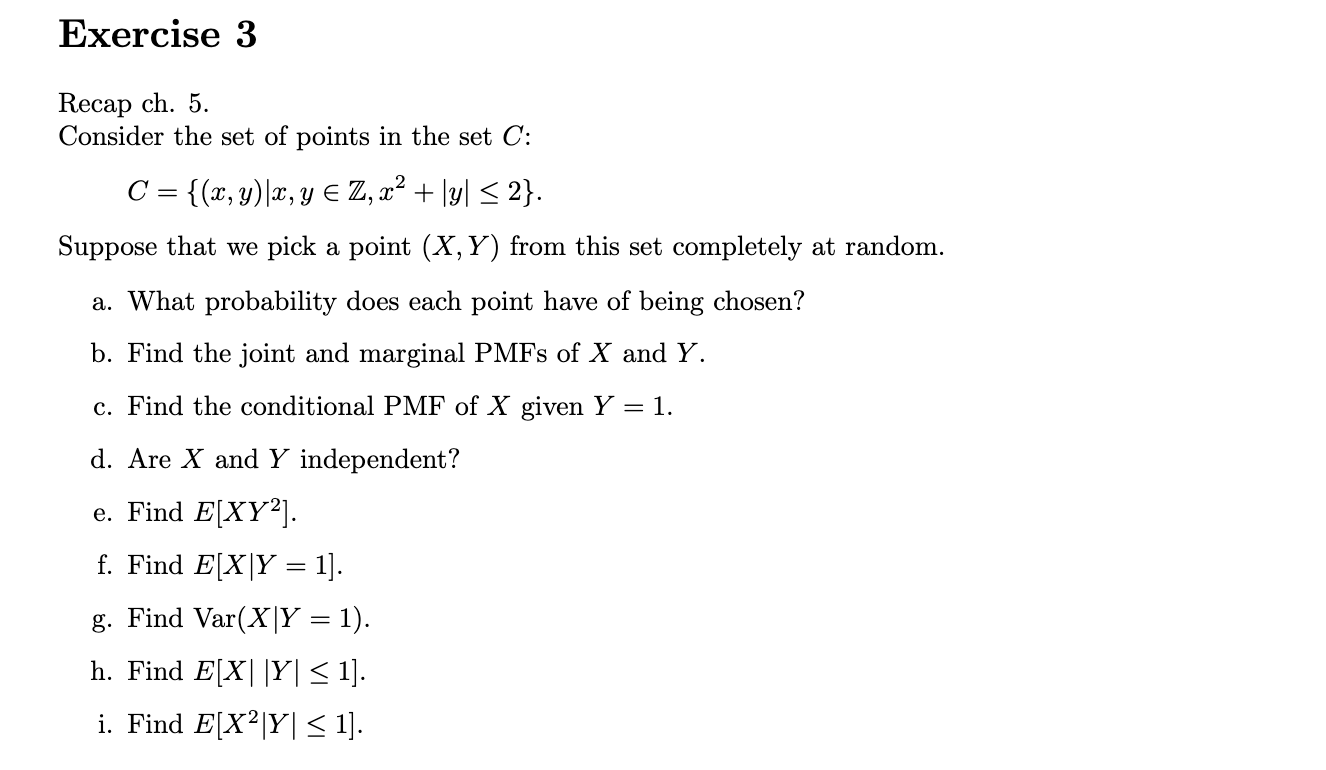

In [23]:
Image('https://cdn.mathpix.com/snip/images/EcZXywF6uBUPO2qKHZAj_WxJ33CJW14LbAAM23df0mY.original.fullsize.png', width=500)

In [24]:
#a) Find the joint ang marginal pdfs
index = [-2,-1,0,1,2]
columns = {
    -2: [0,0,0,0, 0], 
    -1: [0, R(1,11), R(1,11), R(1,11), 0], 
    0: [R(1,11), R(1,11), R(1,11), R(1,11), R(1,11)],
    1: [0, R(1,11), R(1,11), R(1,11), 0],
    2: [0,0, 0, 0, 0]
}

df = pd.DataFrame(data = columns, index = index)

#marginal PMFs of X and Y
marginal_pmf_x = df.sum(axis=0)
print(marginal_pmf_x)
marginal_pmf_y = df.apply(sum, axis=1)
print(marginal_pmf_y)

-2       0
-1    3/11
 0    5/11
 1    3/11
 2       0
dtype: object
-2    1/11
-1    3/11
 0    3/11
 1    3/11
 2    1/11
dtype: object


In [25]:
#d) are X and Y independent?

joint_pmf_float = df.astype(float)

marginal_pmf_x = joint_pmf_float.sum(axis=0)
marginal_pmf_y = joint_pmf_float.sum(axis=1)


is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()

if is_independent:
    print("X and Y are independent")
else:
    print("X and Y are not independent")


X and Y are not independent


/var/folders/0d/xh0t2jcs0471b2ljhkld6w800000gn/T/ipykernel_1770/3716201641.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()


In [26]:
#e) find E[x*y**2]
marginal_pmf_x_values = marginal_pmf_x.values
marginal_pmf_y_values = marginal_pmf_y.values

EXY2 = (np.array(df.index)**2).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY^2]: {} , {}".format(EXY2, round(float(EXY2), 2)))



EX = np.array(df.columns).dot(marginal_pmf_x_values)
print("E[X]: {} , {}".format(EX, round(float(EX), 2)))

EY = np.array(df.index).dot(marginal_pmf_y_values)
print("E[Y]: {} , {}".format(EY, round(float(EY), 2)))

EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY]: {} , {}".format(EXY, round(float(EXY), 2)))

EX2 = (np.array(df.columns)**2).dot(marginal_pmf_x_values)
print("E[X^2]: {} , {}".format(EX2, round(float(EX2), 2)))

EY2 = (np.array(df.index)**2).dot(marginal_pmf_y_values)
print("E[Y^2]: {} , {}".format(EY2, round(float(EY2), 2)))

#f) find E[x|y=1]
EX_given_Y1 = np.array(df.columns).dot(np.array(df.loc[1]))
print("E[X|Y=1]: {} , {}".format(EX_given_Y1, round(float(EX_given_Y1), 2)))

EX2_given_Y1 = (np.array(df.columns)**2).dot(np.array(df.loc[1]))
print("E[X^2|Y=1]: {} , {}".format(EX2_given_Y1, round(float(EX2_given_Y1), 2)))

#g) Find var(x|y=1)

E_X_GIVEN_Y_is_1 = (np.array(df[1]) / marginal_pmf_y[1]).dot(np.array(index))
E_X2_GIVEN_Y_is_1 = (np.array(df[1]) / marginal_pmf_y[1]).dot(np.array(df.columns)**2)
V_X_GIVEN_Y_is_1 = E_X2_GIVEN_Y_is_1 - E_X_GIVEN_Y_is_1**2
print("Var[X|Y=1]:  {} , {}".format(V_X_GIVEN_Y_is_1, round(float(V_X_GIVEN_Y_is_1), 2)))

#h) Find E[x||y|≤1]
E_X_given_abs_Y_is_1 = (np.array(df[1]) / marginal_pmf_y[1]).dot(np.array(index))
print("E[X|abs(Y)<=1]: {} , {}".format(E_X_given_abs_Y_is_1, round(float(E_X_given_abs_Y_is_1), 2)))

#i) Find E[x^2|y≤1]
E_X2_given_Y_is_1 = (np.array(df[1]) / marginal_pmf_y[1]).dot(np.array(df.columns)**2)
print("E[X^2|Y=1]: {} , {}".format(E_X2_given_Y_is_1, round(float(E_X2_given_Y_is_1), 2)))

E[XY^2]: 0 , 0.0
E[X]: 0.0 , 0.0
E[Y]: 0.0 , 0.0
E[XY]: 0 , 0.0
E[X^2]: 0.5454545454545454 , 0.55
E[Y^2]: 1.2727272727272727 , 1.27
E[X|Y=1]: 0 , 0.0
E[X^2|Y=1]: 2/11 , 0.18
Var[X|Y=1]:  0.666666666666667 , 0.67
E[X|abs(Y)<=1]: 0 , 0.0
E[X^2|Y=1]: 0.666666666666667 , 0.67


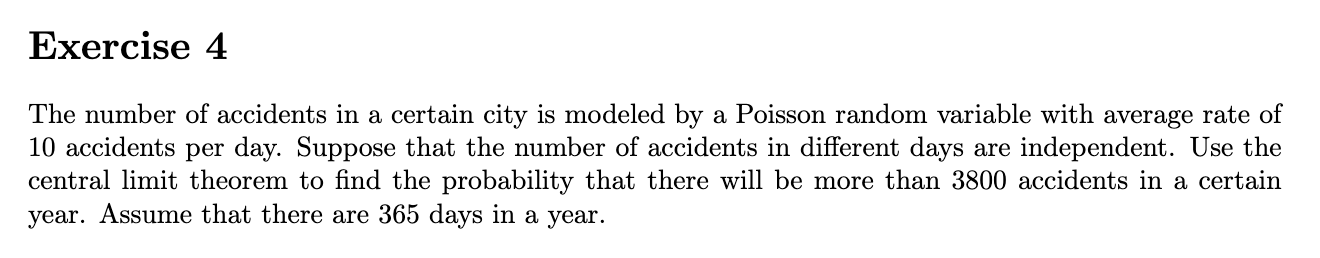

In [27]:
Image('https://cdn.mathpix.com/snip/images/5Osn9bw6Q1PVDOrLw-0Ry23WlYMByqkC9dZYxsmlAYk.original.fullsize.png', width=500)

In [30]:
#X (for the year) is a Poisson distribution with lambda = 10 * 365 = 3650
# If X~Poisson(λ) and λ > 30, then X is approximately normal with mean λ and variance λ
# and our lambda is bigger than 30 so we can treated as a normal distribution
#Using central limit theorem, we can approximate the distribution of X as a normal distribution with mean 3650 and variance 3650
result = norm.sf(3800, loc=3650, scale=np.sqrt(3650))
result = round(result, 4)
print("P(X>3650): {}".format(result))

P(X>3650): 0.0065
